# 第10章 循环神经网络

## 习题1
以下关于RNN的说法不正确的是：  
&emsp;A. RNN的权值更新通过与MLP相同的传统反向传播算法进行计算。  
&emsp;B. RNN的中间结果不仅取决于当前的输入，还取决于上一时间步的中间结果。  
&emsp;C. RNN结构灵活，可以控制输入输出的数目，以针对不同的任务。  
&emsp;D. RNN中容易出现梯度消失或梯度爆炸问题，因此很难应用在序列较长的任务上。

**解答**

&emsp;&emsp;**答案：A**  
&emsp;&emsp;A. 说法不正确。RNN的权值更新并非使用与传统MLP相同的反向传播算法，而是通过随时间反向传播（BPTT）算法。BPTT需要将RNN按时间步展开，计算梯度时需考虑时间维度上的累积效应，这与普通反向传播（仅处理静态网络结构）有本质区别。  
&emsp;&emsp;B. 说法正确。RNN的核心特点是隐藏状态的循环传递，当前时刻的中间结果（隐藏状态）确实由当前输入和上一时刻的隐藏状态共同决定。  
&emsp;&emsp;C. 说法正确。RNN支持灵活的输入输出配置（如多对一、一对多、多对多等），可适应不同任务需求（如序列生成、分类、翻译等）。  
&emsp;&emsp;D. 说法正确。RNN因梯度在长序列中需跨时间步传播，容易因连乘效应导致梯度消失或爆炸，这是其处理长序列任务的主要缺陷。

## 习题2
以下关于GRU的说法正确的是：  
&emsp;A. GRU主要改进了RNN从中间结果到输出之间的结构，可以提升RNN的表达能力。  
&emsp;B. GRU相较于一般的RNN更为复杂，但训练反而更加简单。  
&emsp;C. 没有一种网络结构可以完整保留过去的所有信息，GRU只是合适的取舍方式。  
&emsp;D. 重置门和更新门的输入完全相同，因此可以合并为一个门。

**解答**

&emsp;&emsp;**答案：B C**  
&emsp;&emsp;A. 错误。GRU的核心改进在于门控机制（更新门与重置门），而非中间结果到输出的结构。其设计重点在于控制隐藏状态的信息流动，缓解梯度问题，而非直接增强输出表达能力。   
&emsp;&emsp;B. 正确。GRU的结构比普通RNN复杂，其增加了门控参数，虽然门控单元的值也是由网络训练得到的，但是门控单元的引入使得GRU可以自我调节梯度，训练更加简单。  
&emsp;&emsp;C. 正确。所有循环网络（包括GRU、LSTM）均无法完整保留所有历史信息，而是通过门控机制进行选择性取舍，这是其设计本质   
&emsp;&emsp;D. 错误。重置门和更新门虽输入相同，但功能独立（分别控制历史遗忘与新信息融合），参数矩阵不同，无法合并。  

## 习题3
在10.3动手实现GRU一节中，根据任务特点，我们用到的RNN的输入输出对应关系是什么？

**解答**

&emsp;&emsp;**答案：多对多的RNN结构**   
&emsp;&emsp;在10.3节动手实现GRU中，任务是基于时间序列数据进行预测。具体来说，任务是根据当前时间步的输入数据，预测下一个时间步的输出数据。因此，这种输入输出对应关系属于多对多的RNN结构。  
&emsp;&emsp;**输入**：输入是一个时间序列，每个时间步有一个输入值。  
&emsp;&emsp;**输出**：输出也是一个时间序列，每个时间步有一个输出值。输出值是基于输入值预测的下一个时间步的值。  
&emsp;&emsp;**多对多**：输入和输出的时间步是同步的，即每个时间步的输入对应一个时间步的输出，且输入和输出的序列长度相同。

## 习题4
GRU的重置门和更新门，哪个可以维护长期记忆？哪个可以捕捉短期信息？

**解答**

&emsp;&emsp;**答案：更新门可以维护长期记忆，重置门可以捕捉短期信息**  
&emsp;&emsp;GRU的更新门（update gate）是控制隐藏状态信息流动的关键，它通过计算当前时间步的输入和上一时间步的隐藏状态，并使用一个sigmoid函数进行映射，从而控制隐藏状态的更新。因此，更新门可以维护长期记忆。  
&emsp;&emsp;GRU的重置门（reset gate）是控制隐藏状态信息遗忘的关键，它通过计算当前时间步的输入和上一时间步的隐藏状态，并使用一个sigmoid函数进行映射，从而控制隐藏状态的遗忘。因此，重置门可以捕捉短期信息。 

## 习题5
基于本章的代码，调整RNN和GRU的输入序列长度并做同样的训练和测试，观察其模型性能随序列长度的变化情况。

数据集大小：1000


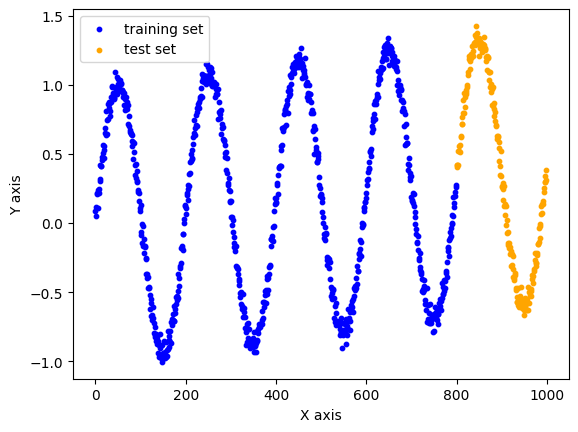

In [1]:
# 导入必要库和数据集，并将数据集的图像绘制出来
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn

# 导入数据集
data = np.loadtxt('sindata_1000.csv', delimiter=',')
num_data = len(data)
split = int(0.8 * num_data)
print(f'数据集大小：{num_data}')
# 数据集可视化
plt.figure()
plt.scatter(np.arange(split), data[:split], 
    color='blue', s=10, label='training set')
plt.scatter(np.arange(split, num_data), data[split:], 
    color='orange', s=10, label='test set')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.legend()
plt.show()
# 分割数据集
train_data = np.array(data[:split])
test_data = np.array(data[split:])

In [2]:
# 输入序列长度从原来的20调整至30
seq_len = 30
# 处理训练数据，把切分序列后多余的部分去掉
train_num = len(train_data) // (seq_len + 1) * (seq_len + 1)
train_data = np.array(train_data[:train_num]).reshape(-1, seq_len + 1, 1)
np.random.seed(0)
torch.manual_seed(0)

x_train = train_data[:, :seq_len] # 形状为(num_data, seq_len, input_size)
y_train = train_data[:, 1: seq_len + 1]
print(f'训练序列数：{len(x_train)}')

# 转为PyTorch张量
x_train = torch.from_numpy(x_train).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)
x_test = torch.from_numpy(test_data[:-1]).to(torch.float32)
y_test = torch.from_numpy(test_data[1:]).to(torch.float32)

训练序列数：25


In [3]:
class GRU(nn.Module):
    # 包含PyTorch的GRU和拼接的MLP
    def __init__(self, input_size, output_size, hidden_size):
        super().__init__()
        # GRU模块
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size) 
        # 将中间变量映射到预测输出的MLP
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):
        # 前向传播
        # x的维度为(batch_size, seq_len, input_size)
        # GRU模块接受的输入为(seq_len, batch_size, input_size)
        # 因此需要对x进行变换
        # transpose函数可以交换x的坐标轴
        # out的维度是(seq_len, batch_size, hidden_size)
        out, hidden = self.gru(torch.transpose(x, 0, 1), hidden) 
        # 取序列最后的中间变量输入给全连接层
        out = self.linear(out.view(-1, hidden_size))
        return out, hidden

In [4]:
# 超参数
input_size = 1 # 输入维度
output_size = 1 # 输出维度
hidden_size = 16 # 中间变量维度
learning_rate = 5e-4

# 初始化网络
gru = GRU(input_size, output_size, hidden_size)
gru_optim = torch.optim.Adam(gru.parameters(), lr=learning_rate)

# GRU测试函数，x和hidden分别是初始的输入和中间变量
def test_gru(gru, x, hidden, pred_steps):
    pred = []
    inp = x.view(-1, input_size)
    for i in range(pred_steps):
        gru_pred, hidden = gru(inp, hidden)
        pred.append(gru_pred.detach())
        inp = gru_pred
    return torch.concat(pred).reshape(-1)

In [5]:
# MLP的超参数
hidden_1 = 32
hidden_2 = 16
mlp = nn.Sequential(
    nn.Linear(input_size, hidden_1),
    nn.ReLU(),
    nn.Linear(hidden_1, hidden_2),
    nn.ReLU(),
    nn.Linear(hidden_2, output_size)
)
mlp_optim = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

# MLP测试函数，相比于GRU少了中间变量
def test_mlp(mlp, x, pred_steps):
    pred = []
    inp = x.view(-1, input_size)
    for i in range(pred_steps):
        mlp_pred = mlp(inp)
        pred.append(mlp_pred.detach())
        inp = mlp_pred
    return torch.concat(pred).reshape(-1)

In [6]:
max_epoch = 150
criterion = nn.functional.mse_loss
hidden = None # GRU的中间变量

# 训练损失
gru_losses = []
mlp_losses = []
gru_test_losses = []
mlp_test_losses = []
# 开始训练
with tqdm(range(max_epoch)) as pbar:
    for epoch in pbar:
        st = 0
        gru_loss = 0.0
        mlp_loss = 0.0
        # 随机梯度下降
        for X, y in zip(x_train, y_train):
            # 更新GRU模型
            # 我们不需要通过梯度回传更新中间变量
            # 因此将其从有梯度的部分分离出来
            if hidden is not None:
                hidden.detach_()
            gru_pred, hidden = gru(X[None, ...], hidden)
            gru_train_loss = criterion(gru_pred.view(y.shape), y)
            gru_optim.zero_grad()
            gru_train_loss.backward()
            gru_optim.step()
            gru_loss += gru_train_loss.item()
            # 更新MLP模型
            # 需要对输入的维度进行调整，变成(seq_len, input_size)的形式
            mlp_pred = mlp(X.view(-1, input_size))
            mlp_train_loss = criterion(mlp_pred.view(y.shape), y)
            mlp_optim.zero_grad()
            mlp_train_loss.backward()
            mlp_optim.step()
            mlp_loss += mlp_train_loss.item()
        
        gru_loss /= len(x_train)
        mlp_loss /= len(x_train)
        gru_losses.append(gru_loss)
        mlp_losses.append(mlp_loss)
        
        # 训练和测试时的中间变量序列长度不同，训练时为seq_len，测试时为1
        gru_pred = test_gru(gru, x_test[0], hidden[:, -1], len(y_test))
        mlp_pred = test_mlp(mlp, x_test[0], len(y_test))
        gru_test_loss = criterion(gru_pred, y_test).item()
        mlp_test_loss = criterion(mlp_pred, y_test).item()
        gru_test_losses.append(gru_test_loss)
        mlp_test_losses.append(mlp_test_loss)
        
        pbar.set_postfix({
            'Epoch': epoch,
            'GRU loss': f'{gru_loss:.4f}',
            'MLP loss': f'{mlp_loss:.4f}',
            'GRU test loss': f'{gru_test_loss:.4f}',
            'MLP test loss': f'{mlp_test_loss:.4f}'
        })

100%|██████████| 150/150 [00:19<00:00,  7.54it/s, Epoch=149, GRU loss=0.0038, MLP loss=0.0056, GRU test loss=0.3646, MLP test loss=0.5354]


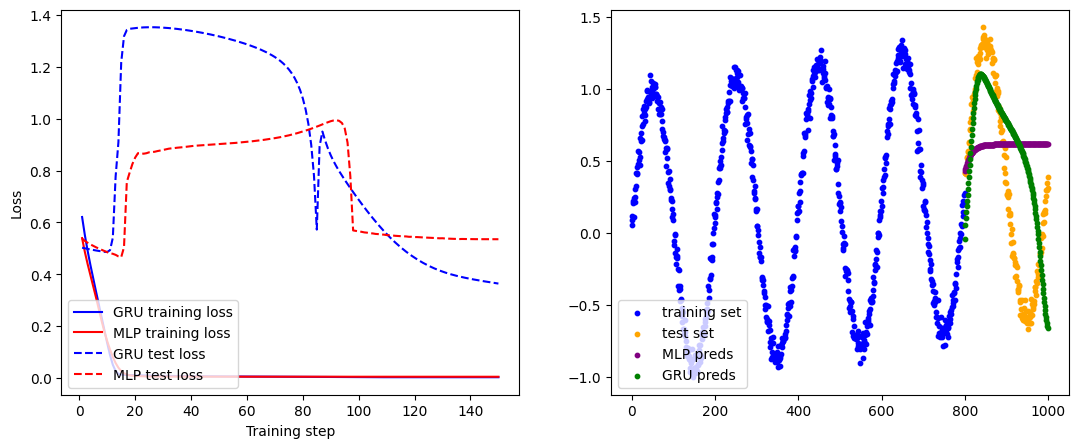

In [7]:
# 最终测试结果
gru_preds = test_gru(gru, x_test[0], hidden[:, -1], len(y_test)).numpy()
mlp_preds = test_mlp(mlp, x_test[0], len(y_test)).numpy()

plt.figure(figsize=(13, 5))

# 绘制训练曲线
plt.subplot(121)
x_plot = np.arange(len(gru_losses)) + 1
plt.plot(x_plot, gru_losses, color='blue', label='GRU training loss')
plt.plot(x_plot, mlp_losses, color='red', label='MLP training loss')
plt.plot(x_plot, gru_test_losses, color='blue', 
    linestyle='--', label='GRU test loss')
plt.plot(x_plot, mlp_test_losses, color='red', 
    linestyle='--', label='MLP test loss')
plt.xlabel('Training step')
plt.ylabel('Loss')
plt.legend(loc='lower left')

# 绘制真实数据与模型预测值的图像
plt.subplot(122)
plt.scatter(np.arange(split), data[:split], color='blue', 
    s=10, label='training set')
plt.scatter(np.arange(split, num_data), data[split:], color='orange', 
    s=10,label='test set')
plt.scatter(np.arange(split, num_data - 1), mlp_preds, color='purple', 
    s=10, label='MLP preds')
plt.scatter(np.arange(split, num_data - 1), gru_preds, color='green', 
    s=10, label='GRU preds')
plt.legend(loc='lower left')
plt.show()

## 习题6
PyTorch中还提供了封装好的LSTM工具 ```torch.nn.LSTM```，使用方法与GRU类似。将本节代码中的GRU改为LSTM，对比两者的表现

数据集大小：1000


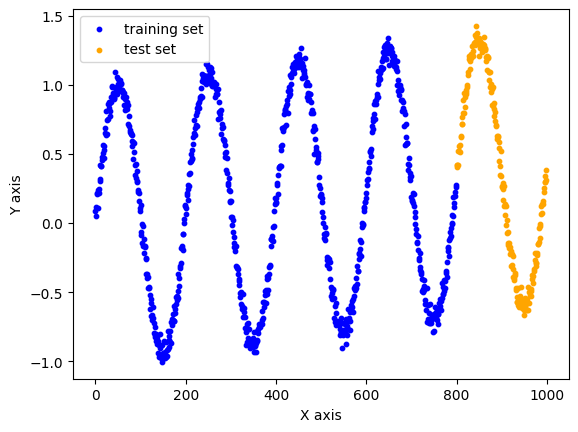

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn

# 导入数据集
data = np.loadtxt('sindata_1000.csv', delimiter=',')
num_data = len(data)
split = int(0.8 * num_data)
print(f'数据集大小：{num_data}')
# 数据集可视化
plt.figure()
plt.scatter(np.arange(split), data[:split], 
    color='blue', s=10, label='training set')
plt.scatter(np.arange(split, num_data), data[split:], 
    color='orange', s=10, label='test set')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.legend()
plt.show()
# 分割数据集
train_data = np.array(data[:split])
test_data = np.array(data[split:])

In [2]:
# 输入序列长度
seq_len = 20
# 处理训练数据，把切分序列后多余的部分去掉
train_num = len(train_data) // (seq_len + 1) * (seq_len + 1)
train_data = np.array(train_data[:train_num]).reshape(-1, seq_len + 1, 1)
np.random.seed(0)
torch.manual_seed(0)

x_train = train_data[:, :seq_len] # 形状为(num_data, seq_len, input_size)
y_train = train_data[:, 1: seq_len + 1]
print(f'训练序列数：{len(x_train)}')

# 转为PyTorch张量
x_train = torch.from_numpy(x_train).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)
x_test = torch.from_numpy(test_data[:-1]).to(torch.float32)
y_test = torch.from_numpy(test_data[1:]).to(torch.float32)

训练序列数：38


In [3]:
class LSTM(nn.Module):
    # 包含PyTorch的LSTM和拼接的MLP
    def __init__(self, input_size, output_size, hidden_size):
        super().__init__()
        # LSTM模块
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
        # 将中间变量映射到预测输出的MLP
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden_size = hidden_size
        
    def forward(self, x, hidden):
        # 前向传播
        # x的维度为(batch_size, seq_len, input_size)
        # LSTM模块接受的输入为(seq_len, batch_size, input_size)
        # 因此需要对x进行变换
        # transpose函数可以交换x的坐标轴
        # out的维度是(seq_len, batch_size, hidden_size)
        out, hidden = self.lstm(torch.transpose(x, 0, 1), hidden) 
        # 取序列最后的中间变量输入给全连接层
        out = self.linear(out.view(-1, self.hidden_size))
        return out, hidden

In [4]:
# 超参数
input_size = 1 # 输入维度
output_size = 1 # 输出维度
hidden_size = 16 # 中间变量维度
learning_rate = 5e-4

# 初始化网络
lstm = LSTM(input_size, output_size, hidden_size)
lstm_optim = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# LSTM测试函数，x和hidden分别是初始的输入和中间变量
def test_lstm(lstm, x, hidden, pred_steps):
    pred = []
    inp = x.view(-1, input_size)
    for i in range(pred_steps):
        lstm_pred, hidden = lstm(inp, hidden)
        pred.append(lstm_pred.detach())
        inp = lstm_pred
    return torch.cat(pred).reshape(-1)

In [5]:
class GRU(nn.Module):
    # 包含PyTorch的GRU和拼接的MLP
    def __init__(self, input_size, output_size, hidden_size):
        super().__init__()
        # GRU模块
        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size) 
        # 将中间变量映射到预测输出的MLP
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):
        # 前向传播
        # x的维度为(batch_size, seq_len, input_size)
        # GRU模块接受的输入为(seq_len, batch_size, input_size)
        # 因此需要对x进行变换
        # transpose函数可以交换x的坐标轴
        # out的维度是(seq_len, batch_size, hidden_size)
        out, hidden = self.gru(torch.transpose(x, 0, 1), hidden) 
        # 取序列最后的中间变量输入给全连接层
        out = self.linear(out.view(-1, hidden_size))
        return out, hidden
    
# 超参数
input_size = 1 # 输入维度
output_size = 1 # 输出维度
hidden_size = 16 # 中间变量维度
learning_rate = 5e-4

# 初始化网络
gru = GRU(input_size, output_size, hidden_size)
gru_optim = torch.optim.Adam(gru.parameters(), lr=learning_rate)

# GRU测试函数，x和hidden分别是初始的输入和中间变量
def test_gru(gru, x, hidden, pred_steps):
    pred = []
    inp = x.view(-1, input_size)
    for i in range(pred_steps):
        gru_pred, hidden = gru(inp, hidden)
        pred.append(gru_pred.detach())
        inp = gru_pred
    return torch.concat(pred).reshape(-1)

In [6]:
max_epoch = 150
criterion = nn.functional.mse_loss
hidden_gru = None # GRU的中间变量
hidden_lstm = None # LSTM的中间变量

# 训练损失
gru_losses = []
lstm_losses = []
gru_test_losses = []
lstm_test_losses = []

# 开始训练
with tqdm(range(max_epoch)) as pbar:
    for epoch in pbar:
        gru_loss = 0.0
        lstm_loss = 0.0
        
        # 随机梯度下降
        for X, y in zip(x_train, y_train):
            # 更新GRU模型
            if hidden_gru is not None:
                hidden_gru.detach_()
            gru_pred, hidden_gru = gru(X[None, ...], hidden_gru)
            gru_train_loss = criterion(gru_pred.view(y.shape), y)
            gru_optim.zero_grad()
            gru_train_loss.backward()
            gru_optim.step()
            gru_loss += gru_train_loss.item()
            
            # 更新LSTM模型
            if hidden_lstm is not None:
                hidden_lstm = tuple(h.detach() for h in hidden_lstm)
            lstm_pred, hidden_lstm = lstm(X[None, ...], hidden_lstm)
            lstm_train_loss = criterion(lstm_pred, y)
            lstm_optim.zero_grad()
            lstm_train_loss.backward()
            lstm_optim.step()
            lstm_loss += lstm_train_loss.item()
        
        gru_loss /= len(x_train)
        lstm_loss /= len(x_train)
        gru_losses.append(gru_loss)
        lstm_losses.append(lstm_loss)
        
        # 训练和测试时的中间变量序列长度不同，训练时为seq_len，测试时为1
        gru_pred = test_gru(gru, x_test[0], hidden_gru[:, -1], len(y_test))
        lstm_pred = test_lstm(lstm, x_test[0], (hidden_lstm[0][:, -1], hidden_lstm[1][:, -1]), len(y_test))
        gru_test_loss = criterion(gru_pred, y_test).item()
        lstm_test_loss = criterion(lstm_pred, y_test).item()
        gru_test_losses.append(gru_test_loss)
        lstm_test_losses.append(lstm_test_loss)
        
        pbar.set_postfix({
            'Epoch': epoch,
            'GRU loss': f'{gru_loss:.4f}',
            'LSTM loss': f'{lstm_loss:.4f}',
            'GRU test loss': f'{gru_test_loss:.4f}',
            'LSTM test loss': f'{lstm_test_loss:.4f}'
        })

100%|██████████| 150/150 [00:35<00:00,  4.25it/s, Epoch=149, GRU loss=0.0033, LSTM loss=0.0036, GRU test loss=0.0202, LSTM test loss=0.8241]


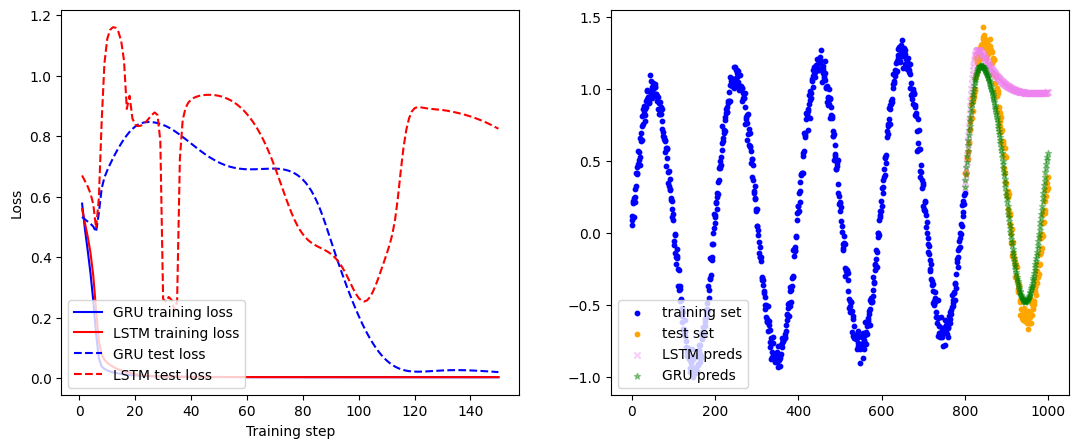

In [8]:
# 最终测试结果
gru_preds = test_gru(gru, x_test[0], hidden_gru[:, -1], len(y_test)).numpy()
lstm_preds = test_lstm(lstm, x_test[0], (hidden_lstm[0][:, -1], hidden_lstm[1][:, -1]), len(y_test)).numpy()

plt.figure(figsize=(13, 5))
# 绘制训练曲线
plt.subplot(121)
x_plot = np.arange(len(gru_losses)) + 1
plt.plot(x_plot, gru_losses, color='blue', label='GRU training loss')
plt.plot(x_plot, lstm_losses, color='red', label='LSTM training loss')
plt.plot(x_plot, gru_test_losses, color='blue', linestyle='--', label='GRU test loss')
plt.plot(x_plot, lstm_test_losses, color='red', linestyle='--', label='LSTM test loss')
plt.xlabel('Training step')
plt.ylabel('Loss')
plt.legend(loc='lower left')

# 绘制真实数据与模型预测值的图像
plt.subplot(122)
plt.scatter(np.arange(split), data[:split], color='blue', s=10, label='training set')
plt.scatter(np.arange(split, num_data), data[split:], color='orange', s=10, label='test set')
plt.scatter(np.arange(split, num_data - 1), lstm_preds, color='violet', 
    marker='x', alpha=0.4, s=20, label='LSTM preds')
plt.scatter(np.arange(split, num_data - 1), gru_preds, color='green', 
    marker='*', alpha=0.4, s=20, label='GRU preds')
plt.legend(loc='lower left')
plt.show()